# Assignment 1, Notebook 2 - Chris Gochis

In [36]:
# Import Packages and Modules
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [37]:
#Check working directory
%pwd

'/Users/ChrisGochis/OneDrive - Rockhurst University/PREDICTIVE MODELS/BIA6303PredictiveModels/Assignment 1'

# Read in Churn Calls dataset as a dataframe called Churn

In [38]:
#Import csv into Pandas Dataset called Auto
Churn = pd.read_csv('Churn_Calls.csv', sep = ",")

In [39]:
Churn.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    AK               1  area_code_408                 no              no   
1    AK              36  area_code_408                 no             yes   
2    AK              36  area_code_415                yes             yes   
3    AK              41  area_code_415                 no              no   
4    AK              42  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0              175.2               74   
1                     30              146.3              128   
2                     19              171.9               96   
3                      0              159.3               66   
4                      0              171.0              129   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             29.78              151.7               79             12.89   
1             24.87              162.5               80             13.81   
2             29.22              198.4              111             16.86   
3             27.08              125.9               75             10.70   
4             29.07              183.9               96             15.63   

   total_night_minutes  total_night_calls  total_night_charge  \
0                230.5                109               10.37   
1                129.3                109                5.82   
2                321.7                 76               14.48   
3                261.9                 76               11.79   
4                130.2                 90                5.86   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                 5.3                 3               1.43   
1                14.5                 6               3.92   
2                10.5                 1               2.84   
3                11.1                 5               3.00   
4                 4.6                 6               1.24   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              1   yes  
3                              1    no  
4                              0    no

In [40]:
Churn.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

# Set target variable to Churn and move to first column.

In [41]:
# designate target variable name
targetName = 'churn'
#print(targetName)
targetSeries = Churn[targetName]
#remove target from current location and insert in column number 0
del Churn[targetName]
Churn.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
Churn.head(10)

churn state  account_length      area_code international_plan  \
0    no    AK               1  area_code_408                 no   
1    no    AK              36  area_code_408                 no   
2   yes    AK              36  area_code_415                yes   
3    no    AK              41  area_code_415                 no   
4    no    AK              42  area_code_415                 no   
5    no    AK              48  area_code_415                 no   
6    no    AK              50  area_code_408                 no   
7    no    AK              51  area_code_510                yes   
8    no    AK              52  area_code_408                 no   
9    no    AK              52  area_code_415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0              no                      0              175.2               74   
1             yes                     30              146.3              128   
2             yes                     19              171.9               96   
3              no                      0              159.3               66   
4              no                      0              171.0              129   
5             yes                     37              211.7              115   
6              no                      0              183.6              107   
7             yes                     12              135.8               60   
8              no                      0              217.0              104   
9             yes                     24              170.9               71   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             29.78              151.7               79             12.89   
1             24.87              162.5               80             13.81   
2             29.22              198.4              111             16.86   
3             27.08              125.9               75             10.70   
4             29.07              183.9               96             15.63   
5             35.99              159.9               84             13.59   
6             31.21               58.6              118              4.98   
7             23.09              200.6              134             17.05   
8             36.89              152.3               83             12.95   
9             29.05              201.4               80             17.12   

   total_night_minutes  total_night_calls  total_night_charge  \
0                230.5                109               10.37   
1                129.3                109                5.82   
2                321.7                 76               14.48   
3                261.9                 76               11.79   
4                130.2                 90                5.86   
5                144.1                 80                6.48   
6                202.6                 99                9.12   
7                192.4                 98                8.66   
8                134.3                109                6.04   
9                159.0                124                7.15   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                 5.3                 3               1.43   
1                14.5                 6               3.92   
2                10.5                 1               2.84   
3                11.1                 5               3.00   
4                 4.6                 6               1.24   
5                12.2                 1               3.29   
6                 8.7                 3               2.35   
7                12.3                 7               3.32   
8                11.8                 4               3.19   
9                 4.1                 5               1.11   

   number_customer_service_calls  
0                              1  
1                              0  
2                              

In [42]:
#Check for NaN values
Churn.isna().any()

churn                            False
state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
dtype: bool

# Exploratory Data Analysis

churn
no     4293
yes     707
Name: churn, dtype: int64


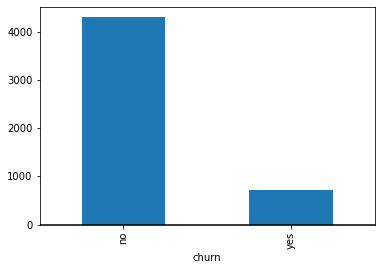

In [43]:
#Create a bar chart of our target variable
groupby = Churn.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

In [44]:
#Describe the database
Churn.describe()

account_length  number_vmail_messages  total_day_minutes  \
count      5000.00000            5000.000000        5000.000000   
mean        100.25860               7.755200         180.288900   
std          39.69456              13.546393          53.894699   
min           1.00000               0.000000           0.000000   
25%          73.00000               0.000000         143.700000   
50%         100.00000               0.000000         180.100000   
75%         127.00000              17.000000         216.200000   
max         243.00000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      5000.000000       5000.000000        5000.000000      5000.000000   
mean        100.029400         30.649668         200.636560       100.191000   
std          19.831197          9.162069          50.551309        19.826496   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.375000        87.000000   
50%         100.000000         30.620000         201.000000       100.000000   
75%         113.000000         36.750000         234.100000       114.000000   
max         165.000000         59.760000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       5000.000000          5000.000000        5000.000000   
mean          17.054322           200.391620          99.919200   
std            4.296843            50.527789          19.958686   
min            0.000000             0.000000           0.000000   
25%           14.140000           166.900000          87.000000   
50%           17.090000           200.400000         100.000000   
75%           19.900000           234.700000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         5000.000000         5000.000000       5000.000000   
mean             9.017732           10.261780          4.435200   
std              2.273763            2.761396          2.456788   
min              0.000000            0.000000          0.000000   
25%              7.510000            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        5000.000000                    5000.000000  
mean            2.771196                       1.570400  
std             0.745514                       1.306363  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

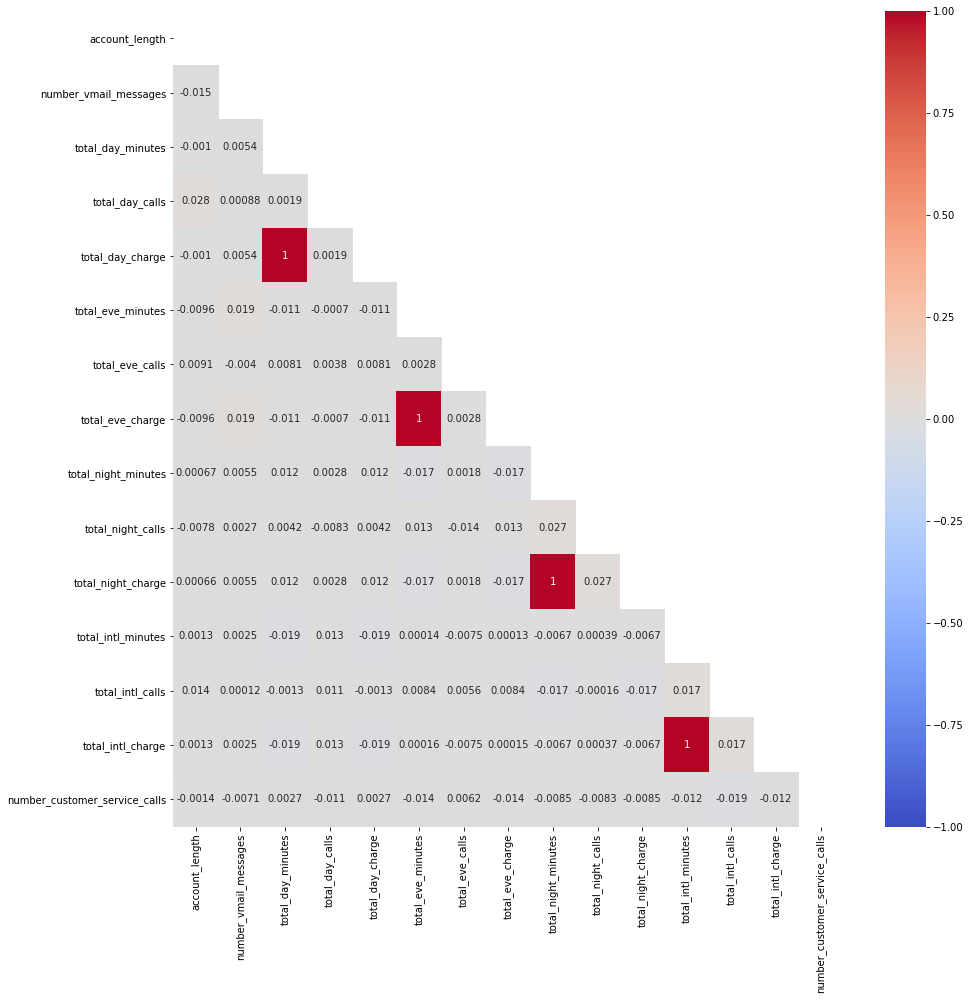

In [47]:
#Check out the variable correlation

#Create correlation matrix
corr_matrix = Churn.iloc[:,1:].corr()
corr_matrix

plt.figure(figsize=(15,15)) #need to adjust size as needed.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

We can see that roughly 14% of the customers (707/5000) in our database have churned. Seeing as this is such a low number, our model is going to need to be very precise to catch which customers could be a churn risk. Since 84% of cour customers don't churn, we are going to need to see predictive performance greater than 84% for this model to be useful.

We can also see by the correlation matrix that there is not much corraltion between most of the variables, but a handful are heavily corrlated to each other. For example Total Daily Charge and Total Daily Min are highly correlated, which makes sense. Same with Total Night Charge and Total Night Min. These may act like duplicate variables.

# Transform Dummy Vairbles and Change Target to Numeric

In [48]:
#Convert Target Variable to Numeric Values
le_dep = preprocessing.LabelEncoder()
Churn['churn'] = le_dep.fit_transform(Churn['churn'])

In [49]:
#Transform factors into dummy variables
for col in Churn.columns[1:]:
	attName = col
	dType = Churn[col].dtype
	missing = pd.isnull(Churn[col]).any()
	uniqueCount = len(Churn[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		Churn = pd.concat([Churn, pd.get_dummies(Churn[col], prefix=col)], axis=1)
		del Churn[attName]

In [50]:
#Confirm transformation
Churn.head()

churn  account_length  number_vmail_messages  total_day_minutes  \
0      0               1                      0              175.2   
1      0              36                     30              146.3   
2      1              36                     19              171.9   
3      0              41                      0              159.3   
4      0              42                      0              171.0   

   total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0               74             29.78              151.7               79   
1              128             24.87              162.5               80   
2               96             29.22              198.4              111   
3               66             27.08              125.9               75   
4              129             29.07              183.9               96   

   total_eve_charge  total_night_minutes  ...  state_WI  state_WV  state_WY  \
0             12.89                230.5  ...         0         0         0   
1             13.81                129.3  ...         0         0         0   
2             16.86                321.7  ...         0         0         0   
3             10.70                261.9  ...         0         0         0   
4             15.63                130.2  ...         0         0         0   

   area_code_area_code_408  area_code_area_code_415  area_code_area_code_510  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        0                        1                        0   
3                        0                        1                        0   
4                        0                        1                        0   

   international_plan_no  international_plan_yes  voice_mail_plan_no  \
0                      1                       0                   1   
1                      1                       0                   0   
2                      0                       1                   0   
3                      1                       0                   1   
4                      1                       0                   1   

   voice_mail_plan_yes  
0                    0  
1                    1  
2                    1  
3                    0  
4                    0  

[5 rows x 74 columns]

In [51]:
#Check column names
Churn.columns

Index(['churn', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'sta

# Create Training and Test Sets
I will be using a 70/30 split. 70% will be used for training the models, and 30% will be used for testing the models.

In [52]:
# Create the training and test sets, split 70/30
features_train, features_test, target_train, target_test = train_test_split(
    Churn.iloc[:,1:].values, Churn.iloc[:,0].values, test_size=0.30, random_state=0)

In [53]:
# Confirm that split was successful
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(1500, 73)
(3500, 73)
(1500,)
(3500,)


# Build Decision Tree

In [54]:
#Import tree module
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier()

In [55]:
#Train the model
clf_dt = clf_dt.fit(features_train, target_train)

In [56]:
#Validate the model
target_predicted_dt = clf_dt.predict(features_test)

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

DT Accuracy Score 0.9153333333333333
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1285
           1       0.71      0.70      0.70       215

    accuracy                           0.92      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.92      0.92      0.92      1500

[[1222   63]
 [  64  151]]
True Negatives:  1222
False Positives:  63
False Negatives:  64
True Positives:  151


In [57]:
#Cross validate the tree using CV = 10
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()  

Cross Validation Score for each K [0.92       0.92285714 0.9        0.93714286 0.92857143 0.91142857
 0.92       0.93428571 0.92857143 0.90857143]


0.9211428571428572

These results are pretty good! We can see an initial accuracy score of 92% which is above our target of 84%. However, we do see that the Precision and Recall are 74% and 70%. The model is correclty identifying 70% of the churn customers, and is 74% correct when predicting whether a customer will churn. I would like to try and get this higher. The goal would be to push these numbers up around our 84% goal.

# Tune the Tree

In [58]:
#Change arguments, swtich to entropy criterion, max depth of 8
clf_dt_mod = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)

In [59]:
#Train new model
clf_dt_mod = clf_dt_mod.fit(features_train, target_train)

In [60]:
#Validate new model
target_predicted_dt_mod = clf_dt_mod.predict(features_test)

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt_mod))
print(classification_report(target_test, target_predicted_dt_mod))
print(confusion_matrix(target_test, target_predicted_dt_mod))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt_mod).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

DT Accuracy Score 0.9446666666666667
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1285
           1       0.84      0.76      0.80       215

    accuracy                           0.94      1500
   macro avg       0.90      0.87      0.88      1500
weighted avg       0.94      0.94      0.94      1500

[[1254   31]
 [  52  163]]
True Negatives:  1254
False Positives:  31
False Negatives:  52
True Positives:  163


In [61]:
#Cross validate the mod tream using CV = 10
scores_mod = cross_val_score(clf_dt_mod, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores_mod.mean()  

Cross Validation Score for each K [0.92       0.92285714 0.9        0.93714286 0.92857143 0.91142857
 0.92       0.93428571 0.92857143 0.90857143]


0.9497142857142856

We made some improvements! Switching the parameters to using the entropy criterion and a max depth of 8, we were able to increase the model's accuracy to 95%. We also saw an increase in the Precision and Recall percentages. We are now correctly identifying 77% of churn customers, and are 84% correct when predicting their churn.

# Perform a K-Nearest Neighbor Classifier

In [62]:
#Build the model using 3 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.pipeline import make_pipeline
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [63]:
#Train the KNN
clf_knn = clf_knn.fit(features_train, target_train)

In [64]:
#Validate the KNN
target_predicted_knn = clf_knn.predict(features_test)

print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print(classification_report(target_test, target_predicted_knn))
print(confusion_matrix(target_test, target_predicted_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

KNN Accuracy Score 0.8553333333333333
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1285
           1       0.48      0.10      0.16       215

    accuracy                           0.86      1500
   macro avg       0.67      0.54      0.54      1500
weighted avg       0.81      0.86      0.81      1500

[[1262   23]
 [ 194   21]]
True Negatives:  1262
False Positives:  23
False Negatives:  194
True Positives:  21


In [65]:
#Cross validate the KNN using CV = 10
scores_knn = cross_val_score(clf_knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores_knn.mean()  

Cross Validation Score for each K [0.92       0.92285714 0.9        0.93714286 0.92857143 0.91142857
 0.92       0.93428571 0.92857143 0.90857143]


0.8608571428571429

It appears that the KNN=3 model is performing worse than our previous Decision Trees, both original and mod. This KNN has an accuracy score of 86%, with a Precision and Recall of 48% and 10%. It appears that this model is performing very poorly at predicting churn customers.

# Create a Random Forest

In [66]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf_rf=RandomForestClassifier()

In [67]:
#Train the random forest
clf_rf.fit(features_train, target_train)

RandomForestClassifier()

In [68]:
#Validate the random forest
target_predicted_rf = clf_rf.predict(features_test)

print("Random Forest Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Random Forest Accuracy Score 0.9486666666666667
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1285
           1       0.97      0.67      0.79       215

    accuracy                           0.95      1500
   macro avg       0.96      0.83      0.88      1500
weighted avg       0.95      0.95      0.94      1500

[[1280    5]
 [  72  143]]
True Negatives:  1280
False Positives:  5
False Negatives:  72
True Positives:  143


In [69]:
#Cross validate the random forest using CV = 10
scores_knn = cross_val_score(clf_rf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores_knn.mean()

Cross Validation Score for each K [0.92       0.92285714 0.9        0.93714286 0.92857143 0.91142857
 0.92       0.93428571 0.92857143 0.90857143]


0.9494285714285716

This is a good model as well! We have a high accuracy score of 95%. The model is correctly identifying 69% of churn customers, and are 97% correct when predicting their churn.

# Which model did best?

After running these models, it appears that the best performing model was our random forest. When comparing it against the second highest performing model, our modded decision tree, they both had very high accuracy at 95%. When comparing the catagorical performance, however, the random forest barely beats the mod tree. Even though it had a lower recall (69% vs 77%) it's precision was much higher (97% vs 84%). When trying to balance these out, we can also look at the F1 score. The random forest recieved an 81, while the mod tree recieved an 80. Therefor, I would recommend using the random forest as the best model of the bunch.